In [2]:
%load_ext autoreload
%autoreload 2

In [1]:
import autorootcwd
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DIR = 'results/structured_loss'
experiments = os.listdir(DIR)

rows = []
errored = []

for experiment in experiments:
    with open(f'{DIR}/{experiment}/metadata.json') as f:
        args = json.load(f)
    args = args['args']
    alpha = args['structured_loss_alpha']
    

    with open(f'{DIR}/{experiment}/val_metrics.json') as f:
        data = json.load(f)
    rows.append({
        'structured_loss_alpha': alpha,
        'accuracy': data['mean']['acc'],
        'root': data['mean']['root'],
        'majmin': data['mean']['majmin'],
        'third': data['mean']['third'],
        'seventh': data['mean']['seventh'],
        'mirex': data['mean']['mirex'],
        'transitions_per_song': data['avg_transitions_per_song'],
        'class_wise_acc_mean': data['class_wise']['acc']['mean'],
        'class_wise_acc_median': data['class_wise']['acc']['median'],
    })


df = pd.DataFrame(rows)

In [3]:
df.sort_values('structured_loss_alpha', inplace=True)
df

,structured_loss_alpha,accuracy,root,majmin,third,seventh,mirex,transitions_per_song,class_wise_acc_mean,class_wise_acc_median
6,0.0,59.668630,78.555035,75.795247,75.105833,61.978816,79.566091,99.661157,18.941328,1.444287
4,0.1,59.513975,77.985505,75.341938,74.711663,61.744327,79.818686,96.070248,19.245498,1.645874
9,0.2,60.074033,78.386134,75.982204,75.309508,62.329893,79.759299,97.185950,19.101052,0.000000
8,0.3,60.384969,78.776852,76.547600,75.830184,62.640772,79.672390,98.090909,19.339172,1.101402
7,0.4,60.410627,78.879175,76.369381,75.722258,62.634629,79.866013,98.392562,19.604626,1.626863
10,0.5,60.125437,78.682197,76.248377,75.593279,62.347689,79.985684,98.004132,19.046986,1.220148
3,0.6,60.538938,79.362612,76.938874,76.284856,62.800354,79.286840,98.628099,19.136166,1.012670
0,0.7,60.980765,79.813794,77.485276,76.824750,63.236442,79.247115,99.177686,19.006035,0.928025
2,0.8,60.806100,79.856683,77.436955,76.791289,63.047942,78.996840,99.739669,18.835211,0.000000
1,0.9,60.498796,79.892942,77.370887,76.739754,62.728558,78.773152,100.611570,18.434836,0.000000


In [4]:
df.drop(df[df['structured_loss_alpha'] == 1].index, inplace=True)

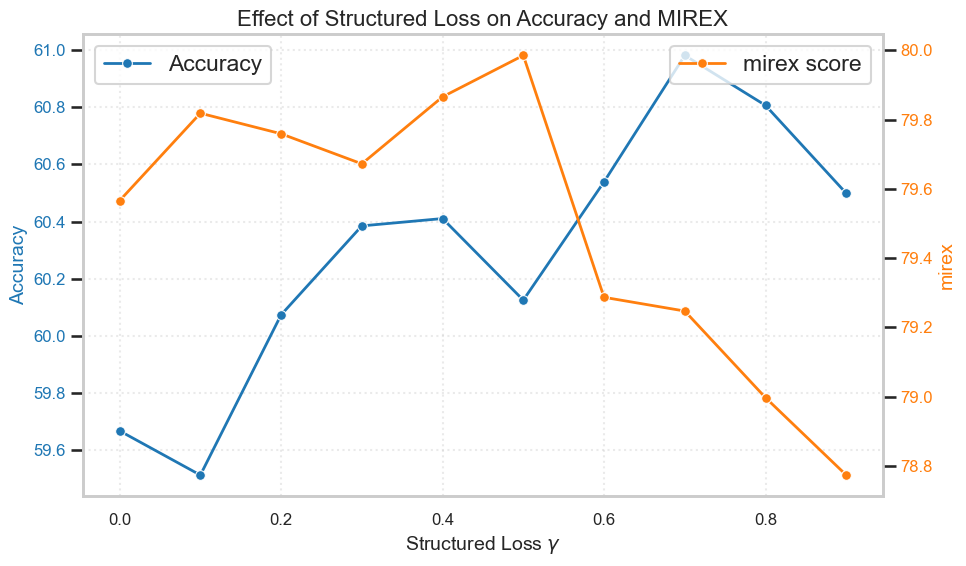

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("talk")

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot accuracy
sns.lineplot(data=df, x='structured_loss_alpha', y='accuracy',
             marker='o', linewidth=2, markersize=7,
             markerfacecolor='tab:blue', markeredgecolor='white',
             ax=ax1, label='Accuracy', color='tab:blue')

ax1.set_xlabel('Structured Loss $\\gamma$', fontsize=14)
ax1.set_ylabel('Accuracy', color='tab:blue', fontsize=14)
ax1.tick_params(axis='y', labelcolor='tab:blue', labelsize=12)
ax1.tick_params(axis='x', labelsize=12)

# Turn on grid only for the primary axis
ax1.grid(True, which='major', axis='both', linestyle=':', alpha=0.4)

# Twin axis for mirex (no grid)
ax2 = ax1.twinx()
sns.lineplot(data=df, x='structured_loss_alpha', y='mirex',
             marker='o', linewidth=2, markersize=7,
             markerfacecolor='tab:orange', markeredgecolor='white',
             ax=ax2, label='mirex score', color='tab:orange')

ax2.set_ylabel('mirex', color='tab:orange', fontsize=14)
ax2.tick_params(axis='y', labelcolor='tab:orange', labelsize=12)

# Disable grid on secondary axis
ax2.grid(False)

# Title
plt.title('Effect of Structured Loss on Accuracy and MIREX', fontsize=16)

# Tight layout
fig.tight_layout()

# Save or show
plt.savefig('thesis/figures/structured_loss_accuracy.png', dpi=300, bbox_inches='tight')
plt.show()